In [ ]:
!pip install caer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 44.6 MB/s eta 0:00:00


In [ ]:
!pip install canaro

In [ ]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [ ]:
IMG_SIZE =(80,80)
channels =1
char_path = r'/content/drive/MyDrive/the-simpsons-characters-dataset/simpsons_dataset'

In [ ]:
char_dict ={}
for char in os.listdir(char_path):
  char_dict[char] =len(os.listdir(os.path.join(char_path,char)))

#Sort in descending order
char_dict =caer.sort_dict(char_dict, descending =True)
char_dict


[('ned_flanders', 1454),
 ('principal_skinner', 1204),
 ('moe_szyslak', 1066),
 ('sideshow_bob', 877),
 ('nelson_muntz', 358),
 ('waylon_smithers', 181),
 ('selma_bouvier', 103),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('troy_mcclure', 8),
 ('miss_hoover', 0),
 ('milhouse_van_houten', 0),
 ('martin_prince', 0),
 ('lisa_simpson', 0),
 ('lionel_hutz', 0),
 ('mayor_quimby', 0),
 ('marge_simpson', 0),
 ('maggie_simpson', 0),
 ('kent_brockman', 0),
 ('krusty_the_clown', 0),
 ('lenny_leonard', 0),
 ('comic_book_guy', 0),
 ('disco_stu', 0),
 ('fat_tony', 0),
 ('homer_simpson', 0),
 ('gil', 0),
 ('groundskeeper_willie', 0),
 ('edna_krabappel', 0),
 ('barney_gumble', 0),
 ('carl_carlson', 0),
 ('agnes_skinner', 0),
 ('apu_nahasapeemapetilon', 0),
 ('abraham_grampa_simpson', 0),
 ('bart_simpson', 0),
 ('charles_montgomery_burns', 0),
 

In [ ]:
characters=[]
count =0
for i in char_dict:
  characters.append(i[0])
  count+=1
  if count>=10:
    break

characters


['ned_flanders',
 'principal_skinner',
 'moe_szyslak',
 'sideshow_bob',
 'nelson_muntz',
 'waylon_smithers',
 'selma_bouvier',
 'ralph_wiggum',
 'patty_bouvier',
 'professor_john_frink']

In [ ]:
#Create the training data
train =caer.preprocess_from_dir(char_path,characters,channels=channels,IMG_SIZE=IMG_SIZE,isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] 1454 files found in 0.03668522834777832s
[INFO] At 1000 files
[INFO] 1204 files found in 0.033315181732177734s
[INFO] At 1000 files
[INFO] 1452 files found in 0.028757572174072266s
[INFO] 877 files found in 0.034388065338134766s
[INFO] 358 files found in 0.009375572204589844s
[INFO] 181 files found in 0.0040340423583984375s
[INFO] 103 files found in 0.006035327911376953s
[INFO] 89 files found in 0.00438380241394043s
[INFO] 72 files found in 0.0036759376525878906s
[INFO] 65 files found in 0.002719402313232422s
----------------------------------------------
[INFO] 5855 files preprocessed! Took 5m 22s


In [ ]:
len(train)

5855

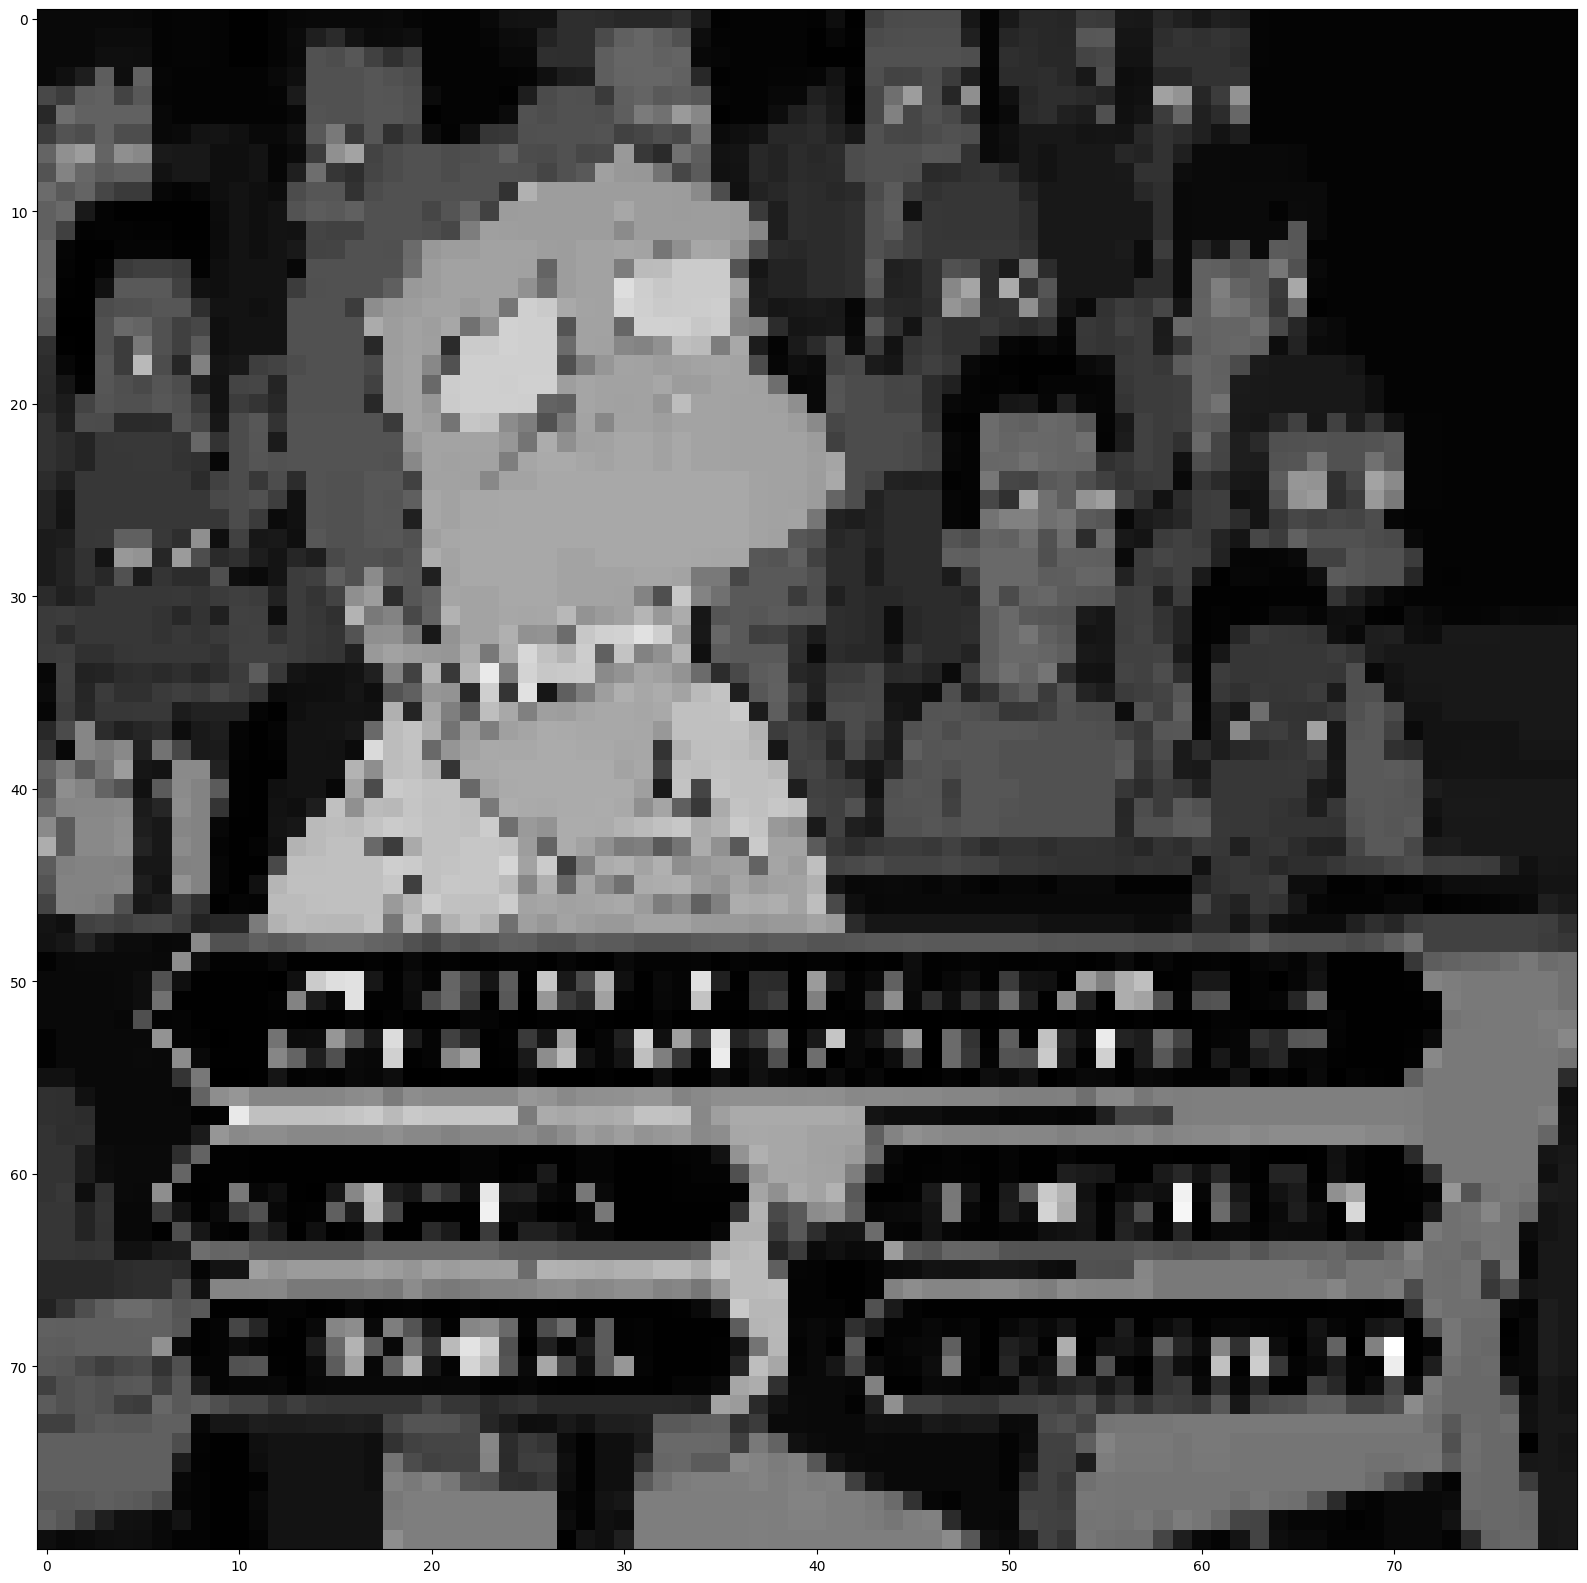

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [ ]:
featureSet,labels=caer.sep_train(train,IMG_SIZE=IMG_SIZE)

In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.utils import to_categorical

#Normalize the FeatureSet==>(0,1)

featureSet=caer.normalize(featureSet)
labels=to_categorical(labels,len(characters))

In [ ]:
del train
del featureSet
del labels
gc.collect()


In [ ]:
x_train, y_train, x_val ,y_val=caer.train_val_split(featureSet,labels,val_ratio=.2)

In [ ]:
BATCH_SIZE=32
EPOCHS=10

In [ ]:
#Image  data generator
datagen= canaro.generators.imageDataGenerator()
train_gen =datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

#Creating the model
model=canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels ,output_dims=len(characters),

                                         loss='binary_crossentropy' ,decay=1e-6 ,learning_rate=0.001,
                                         momentum=0.9 ,nesterov=True)


NameError: name 'x_train' is not defined

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list=[LearningRateScheduler(canaro.Ir_schedule)]

In [ ]:
training =model.fit(train_gen ,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    eppochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks=callbacks_list)


In [ ]:
characters

['ned_flanders',
 'principal_skinner',
 'moe_szyslak',
 'sideshow_bob',
 'nelson_muntz',
 'waylon_smithers',
 'selma_bouvier',
 'ralph_wiggum',
 'patty_bouvier',
 'professor_john_frink']

In [ ]:
test_path= r''

In [ ]:
img=cv.imread(test_path)
plt.imshow(img)
plt.show()
def prepare(img):
  img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  img=cv.resize(img,IMG_SIZE)
  img=caer.reshape(img,IMG_SIZE,1)
  return img

In [ ]:
predictions= model.predict(prepare(img))

In [ ]:
predictions

In [ ]:
print( characters[np.argmax(predictions[0])])

In [ ]:
from google.colab import files
files.download('Simpsons_Deep Computer Vision.ipynb ')
